In [30]:
import json
import numpy as np
with open("../../../blockchain.json",'r') as f:
    data = json.load(f)

In [31]:
# Create a dictionary to store honesty values for each nodeId
honesty_values_dict = {}

# Iterate through the transactions of all blocks
for json_obj in data:
    for transaction in json_obj['Transactions']:
        if transaction['Content']['message_type'] == 1:
            node_id = transaction['Content']['nodeId']
            honesty = transaction['Content']['honesty']

            if node_id not in honesty_values_dict:
                honesty_values_dict[node_id] = []

            honesty_values_dict[node_id].append(honesty)

# Print honesty values for each node in a single line
for node_id in range(1, 101):  # Assuming node IDs are from 1 to 100
    if node_id in honesty_values_dict:
        honesty_list = honesty_values_dict[node_id]
        print(f"Node {node_id}: {honesty_list}")
    else:
        print(f"Node {node_id}: No honesty values")


Node 1: [0.0, 0.08, 0.161, 0.161, 1.137, 1.213, 2.187, 2.305, 2.305, 3.283, 3.365, 4.346, 4.346, 5.326, 5.495, 6.465, 6.785, 7.039, 7.166, 8.142, 8.376, 8.457, 9.435, 9.435, 10.407, 10.574, 11.548, 11.776, 11.861, 12.839, 12.839, 13.818, 13.974, 14.955, 15.39, 15.719, 15.842, 16.823, 17.073, 17.073, 18.056, 18.141]
Node 2: [0.0, 0.963, 1.93, 2.899, 3.872, 4.85, 5.832, 6.81, 7.788, 7.788, 8.768, 8.768, 9.749, 9.832, 10.78, 10.78, 11.759, 11.844, 12.816, 12.987, 13.961, 14.123, 14.163, 15.109, 15.186, 16.157, 16.307, 17.279, 17.406, 17.484, 18.46, 18.542, 19.519, 19.686, 20.665, 20.829, 20.87, 21.856, 21.898, 22.881, 22.924, 23.908]
Node 3: [0.0, 0.942, 1.023, 1.023, 2.007, 1.893, 2.877, 3.035, 3.035, 4.02, 4.102, 5.09, 5.09, 6.078, 6.247, 6.247, 7.23, 7.23, 8.215, 8.301, 9.288, 9.41, 10.397, 10.651, 10.728, 11.71, 11.935, 12.011, 12.996, 13.035, 14.022, 14.186, 15.174, 15.424, 15.554, 16.542, 16.789, 16.958, 17.947, 17.947, 18.938, 19.065]
Node 4: [0.0, 0.95, 1.921, 2.903, 3.878, 4.857,

/tmp/ipykernel_26363/3996459596.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


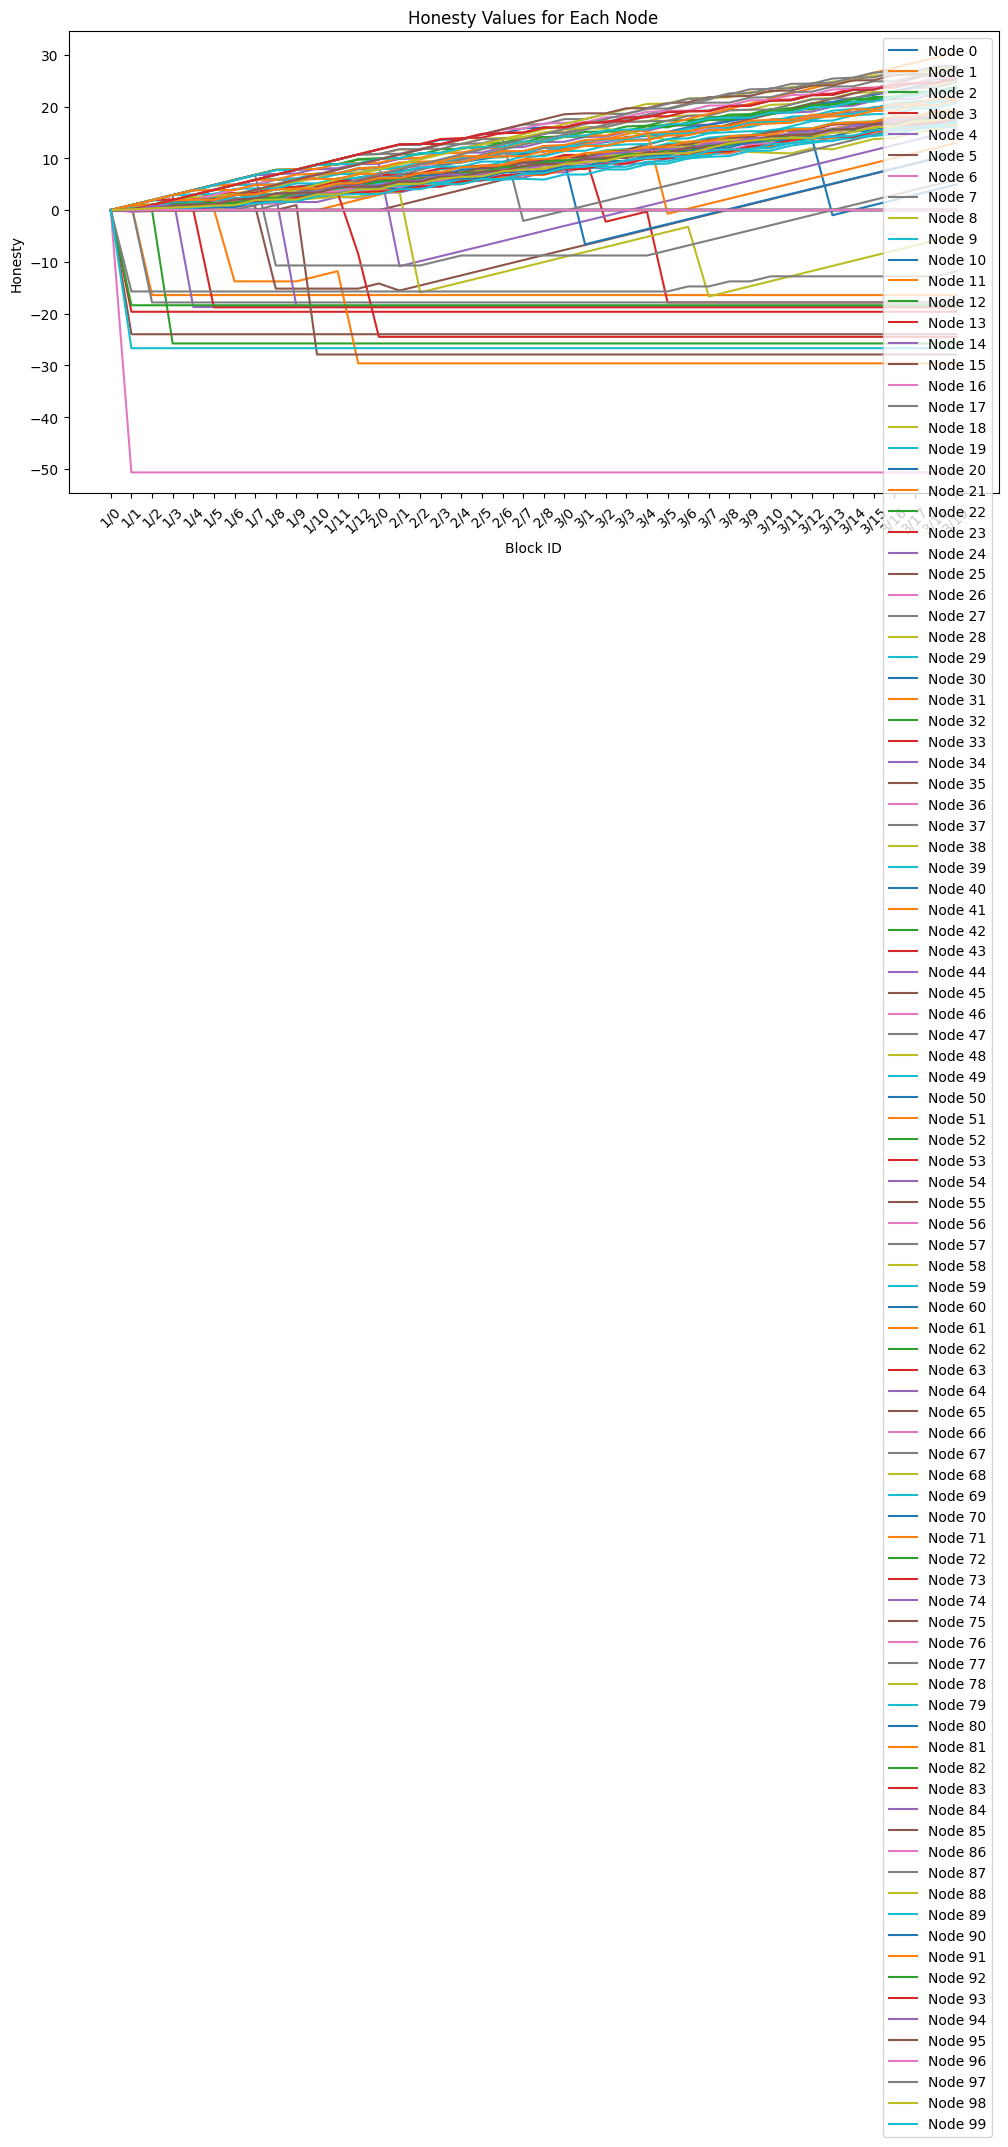

In [33]:
import matplotlib.pyplot as plt

# Specify the node IDs you want to include on the plot
specific_node_ids = [11,17,38,37,77,95,86,97]  # Add the node IDs you want to display

# Prepare data for plotting
node_ids = sorted(honesty_values_dict.keys())
block_ids = [json_obj['BlockId'] for json_obj in data]

plt.figure(figsize=(12, 6))

# Plot honesty values for each node
for node_id in node_ids:
    honesty_values = honesty_values_dict[node_id]
    plt.plot(block_ids, honesty_values, label=f'Node {node_id}')

plt.xlabel('Block ID')
plt.ylabel('Honesty')
plt.title('Honesty Values for Each Node')
plt.legend()
plt.xticks(rotation=45)

# y_ticks = np.arange(-15, 11, 1)
# y_tick_labels = [f'{tick:.0f}' for tick in y_ticks]
# plt.yticks(y_ticks, y_tick_labels)
# plt.yscale('logit')
plt.tight_layout()

# Show or save the plot
plt.show()

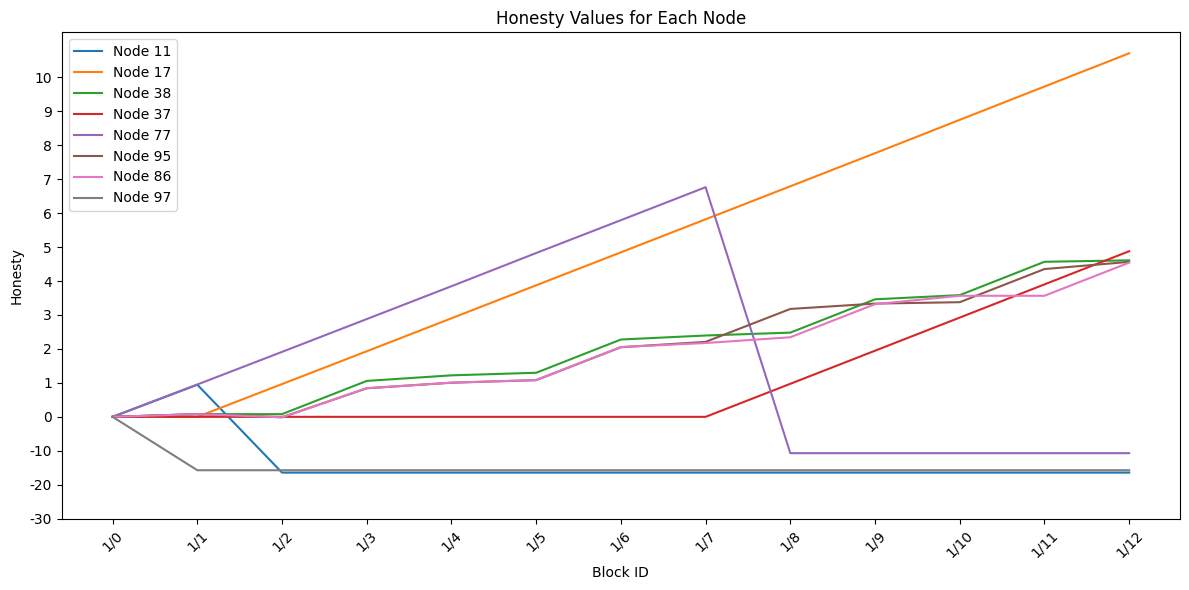

In [29]:
y = [-3, -2, -1, 0,1,2,3,4,5,6,7,8,9,10]
y_ticks = [-30, -20,-10, 0,1,2,3,4,5,6,7,8,9,10]  # Custom y-axis tick values


def process_y_values(y_values):
    return [y / 10 if y < 0 else y for y in y_values]


# Specify the node IDs you want to include on the plot
specific_node_ids = [11,17,38,37,77,95,86,97]  # Add the node IDs you want to display

# Prepare data for plotting
# node_ids = sorted(honesty_values_dict.keys())
block_ids = [json_obj['BlockId'] for json_obj in data]

plt.figure(figsize=(12, 6))

# Plot honesty values for each node
for node_id in specific_node_ids:
    honesty_values = honesty_values_dict[node_id]
    plt.plot(block_ids, process_y_values(honesty_values), label=f'Node {node_id}')

plt.xlabel('Block ID')
plt.ylabel('Honesty')
plt.title('Honesty Values for Each Node')
plt.legend()
plt.xticks(rotation=45)
plt.yticks(y, y_ticks)
# plt.yscale('logit')
plt.tight_layout()

# Show or save the plot
plt.show()